# Import Libraries

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

import pickle


from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
sns.set(style='whitegrid')


# Import DataSet

In [7]:
train=pd.read_csv("train.csv.crdownload")
test=pd.read_csv("test.csv")

In [8]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [9]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


In [12]:
train.shape

(81028, 12)

In [13]:
test.shape

(1000, 21)

# Checking for Missing values

In [16]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

In [17]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# Target Variable (Response)

C:\Users\G Guruvaiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

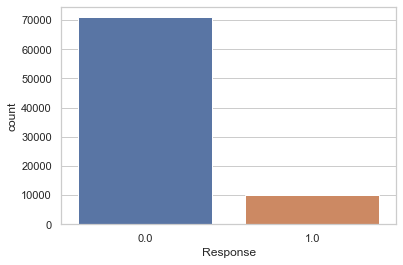

In [80]:
sns.countplot(train.Response)

In [81]:
train.Response.value_counts()

0.0    70983
1.0    10044
Name: Response, dtype: int64

# Gender and Respond

C:\Users\G Guruvaiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

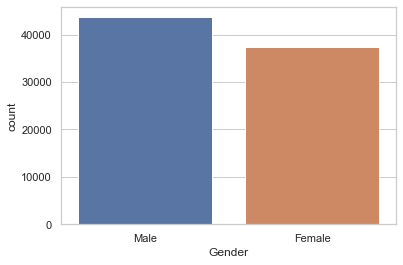

In [84]:
sns.countplot(train.Gender)

# driving license by Gender

In [86]:
df=train.groupby(["Gender"])["Driving_License"].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,37344
1,Male,43684


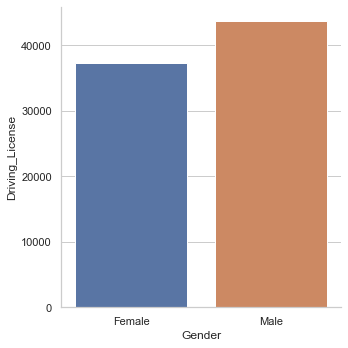

In [89]:
sns.catplot(x="Gender",y="Driving_License",data=df,kind="bar")

C:\Users\G Guruvaiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

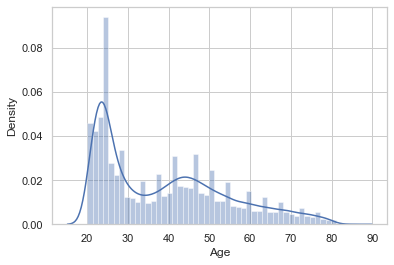

In [101]:
sns.distplot(train['Age'])

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Age'] = le.fit_transform(train['Age'])

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Driving_License'] = le.fit_transform(train['Driving_License'])

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])

In [112]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,24,1,28.0,0,2,1,40454.0,26.0,217.0,1.0
1,2,1,56,1,3.0,0,0,0,33536.0,26.0,183.0,0.0
2,3,1,27,1,28.0,0,2,1,38294.0,26.0,27.0,1.0
3,4,1,1,1,11.0,1,1,0,28619.0,152.0,203.0,0.0
4,5,0,9,1,41.0,1,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81023,81024,1,28,1,39.0,0,0,1,2630.0,157.0,138.0,0.0
81024,81025,0,4,1,3.0,1,1,0,32224.0,152.0,187.0,0.0
81025,81026,0,21,1,36.0,0,0,0,2630.0,124.0,223.0,0.0
81026,81027,1,23,1,26.0,0,0,1,27561.0,22.0,292.0,0.0


<AxesSubplot:>

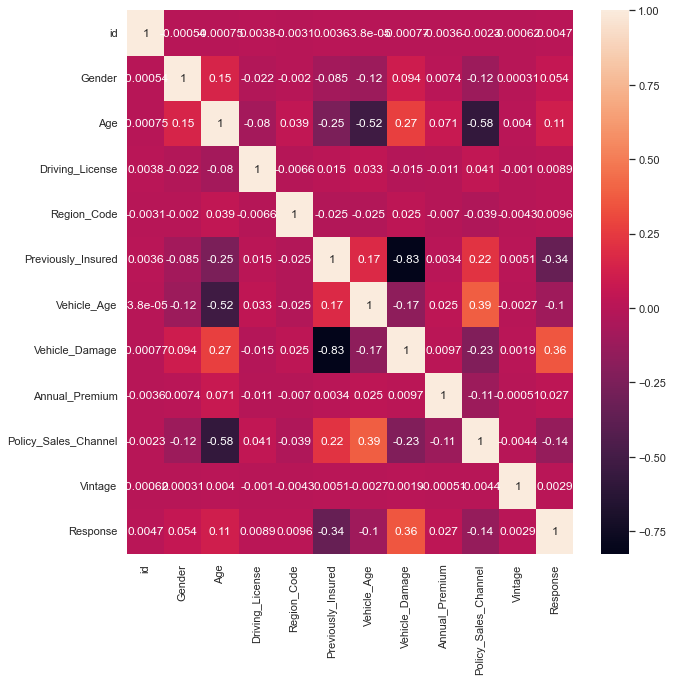

In [114]:
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


In [115]:
X=train.drop(['Age'],axis=1)
Y=train['Age']

In [116]:
std = StandardScaler()
X_ = std.fit_transform(X)

In [117]:
X,Y

(          id  Gender  Driving_License  Region_Code  Previously_Insured  \
 0          1       1                1         28.0                   0   
 1          2       1                1          3.0                   0   
 2          3       1                1         28.0                   0   
 3          4       1                1         11.0                   1   
 4          5       0                1         41.0                   1   
 ...      ...     ...              ...          ...                 ...   
 81023  81024       1                1         39.0                   0   
 81024  81025       0                1          3.0                   1   
 81025  81026       0                1         36.0                   0   
 81026  81027       1                1         26.0                   0   
 81027  81028       0                1          6.0                   0   
 
        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
 0                2  

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,X.shape

((64822, 11), (16206, 11), (81028, 11))

In [120]:
Y_train.shape,Y_test.shape,Y.shape

((64822,), (16206,), (81028,))

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\G Guruvaiah\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [36]:
X_train.dtypes

id                        int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
dtype: object